In [247]:
import xarray as xr

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sys
import json
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Assuming all required data and functions are imported/defined
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature

"""What about an MME?"""

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature
sys.path.append(r'/nesi/project/niwa00018/ML_downscaling_CCAM/A-Robust-Generative-Adversarial-Network-Approach-for-Climate-Downscaling')
from src.process_input_training_data import *
gcm = 'ACCESS-CM2'
#df = xr.open_dataset(f'/nesi/project/niwa00018/ML_downscaling_CCAM/A-Robust-Generative-Adversarial-Network-Approach-for-Climate-Downscaling/outputs/cascaded_perfect_extreme_no_bn_v20_05_24/CCAM_NIWA-REMS_{gcm}_hist_ssp370_pr_ens.nc')[['pr']]
#y_true = xr.open_dataset(f'/nesi/project/niwa00018/ML_downscaling_CCAM/multi-variate-gan/inputs/target_fields/{gcm}_hist_ssp370_pr_psl_tasmin_tasmax_sfcwind_sfcwindmax.nc')
config_file = r'/nesi/project/niwa00018/ML_downscaling_CCAM/A-Robust-Generative-Adversarial-Network-Approach-for-Climate-Downscaling/outputs/cascaded_perfect_framework_extreme_intensity_constraint/config_info.json'
with open(config_file, 'r') as f:
    config = json.load(f)

__, orog, __ = prepare_static_fields(config)


<xarray.DataArray 'orog' ()>
array(1733.36035156) <xarray.DataArray 'he' ()>
array(1157.46264648) <xarray.DataArray 'vegt' ()>
array(17.00000763)


In [250]:

signal_gt = xr.open_dataset(r'/nesi/project/niwa00018/ML_downscaling_CCAM/A-Robust-Generative-Adversarial-Network-Approach-for-Climate-Downscaling/outputs/gt_cc_signal/gt_cc_signal_final.nc')
model_hist = 'historical_run_precip_residual_new_unet_shuffle_off_new_iten_weight_new_padding_new_unet_V2_resid_now_075_iten_v2_ACCESS-CM2'
model_future = r'future_run_precip_residual_new_unet_shuffle_off_new_iten_weight_new_padding_new_unet_V2_resid_now_005_iten_v3_ACCESS-CM2'  # fig, ax = plt.subplots()


In [233]:

def load_gcm(model, gcm):
    return xr.open_dataset(f'/nesi/project/niwa00018/ML_downscaling_CCAM/A-Robust-Generative-Adversarial-Network-Approach-for-Climate-Downscaling/outputs/{model}/CCAM_NIWA-REMS_{gcm}_hist_ssp370_pr_ens.nc')

def load_gcm_unet(model, gcm):
    return xr.open_dataset(f'/nesi/project/niwa00018/ML_downscaling_CCAM/A-Robust-Generative-Adversarial-Network-Approach-for-Climate-Downscaling/outputs/{model}/CCAM_NIWA-REMS_{gcm}_hist_ssp370_pr_unet.nc')
import cartopy.crs as ccrs


In [251]:
unet_future = []
unet_hist = []
gan_future = []
gan_hist =[]
for gcm in signal_gt.GCM.values[:]:
    unet_future.append(load_gcm_unet(model_future, gcm).drop("GCM"))
    unet_hist.append(load_gcm_unet(model_hist, gcm).drop("GCM"))
    gan_future.append(load_gcm(model_future, gcm).drop("GCM"))
    gan_hist.append(load_gcm(model_hist, gcm).drop("GCM"))
unet_future = xr.concat(unet_future, dim ="GCM")
unet_future['GCM'] = (('GCM'), list(signal_gt.GCM.values[:]))
unet_hist = xr.concat(unet_hist, dim ="GCM")
unet_hist['GCM'] = (('GCM'), list(signal_gt.GCM.values[:]))
gan_hist = xr.concat(gan_hist, dim ="GCM")
gan_hist['GCM'] = (('GCM'), list(signal_gt.GCM.values[:]))
gan_future = xr.concat(gan_future, dim ="GCM")
gan_future['GCM'] = (('GCM'), list(signal_gt.GCM.values[:]))

In [261]:
error_future = abs(gan_future.mean("member").hist_clim_rainfall.where(orog>0, np.nan) - signal_gt.where(orog>0, np.nan).hist_clim_rainfall*86400)

In [260]:
error_hist = abs(gan_hist.mean("member").hist_clim_rainfall.where(orog>0, np.nan) - signal_gt.hist_clim_rainfall.where(orog>0, np.nan)*86400)

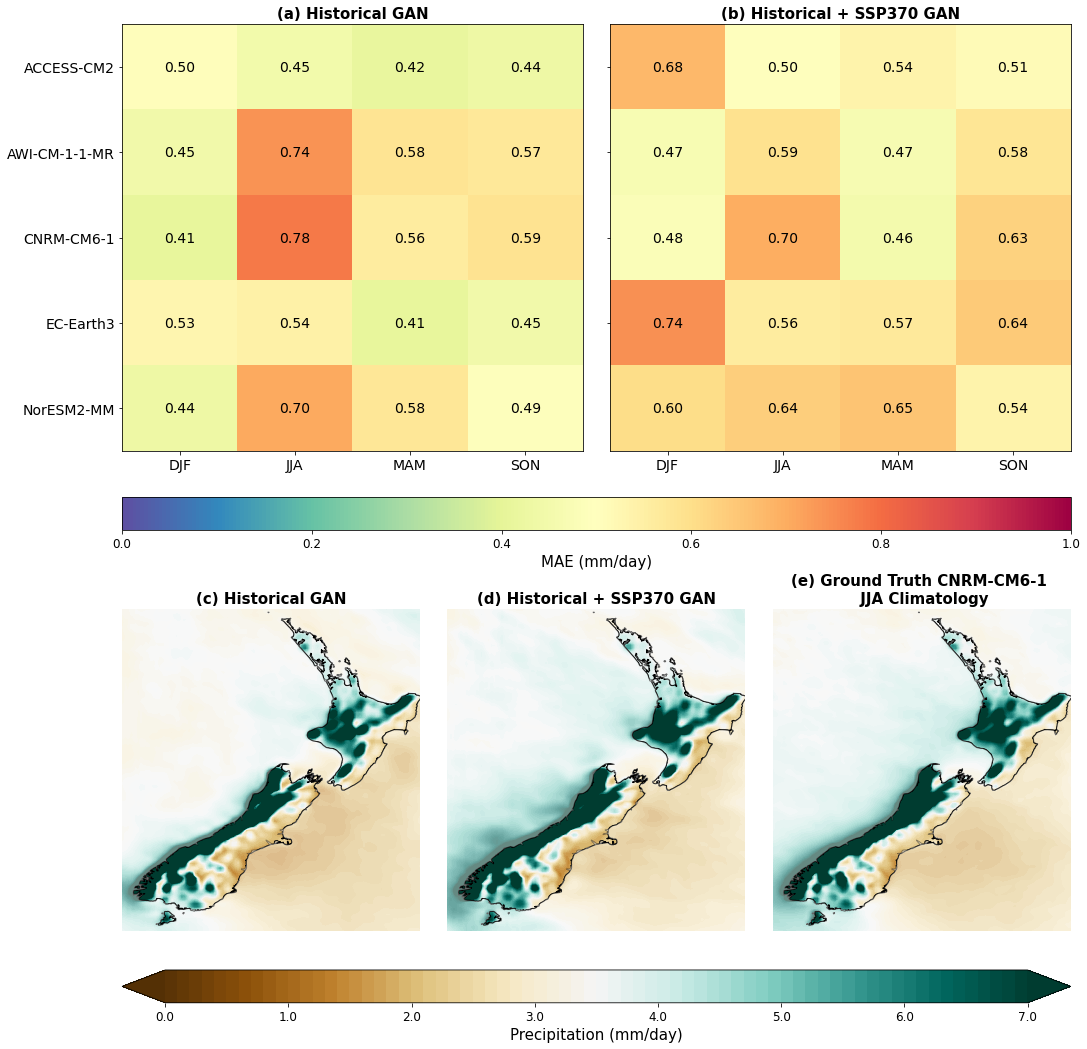

In [264]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec
import cartopy.crs as ccrs

# Create a GridSpec with the desired aspect ratio
gs = GridSpec(25, 6)

# Create the figure
levels = np.arange(0, 7.1, 0.1)
fig = plt.figure(figsize=(17, 18))

# Heatmap plots
ax1 = fig.add_subplot(gs[:11, :3])
ax2 = fig.add_subplot(gs[:11, 3:])

# Additional plots
ax3 = fig.add_subplot(gs[14:24, :2], projection = ccrs.PlateCarree(central_longitude = 171.77))
ax4 = fig.add_subplot(gs[14:24, 2:4], projection = ccrs.PlateCarree(central_longitude = 171.77))
ax5 = fig.add_subplot(gs[14:24, 4:], projection = ccrs.PlateCarree(central_longitude = 171.77))

ax6 = fig.add_subplot(gs[12, :])
ax7 = fig.add_subplot(gs[-1, :])

error_hist_mean = error_hist.mean(["lat", "lon"]).to_pandas()
error_future_mean = error_future.mean(["lat", "lon"]).to_pandas()

cs11 = ax1.imshow(error_hist_mean, cmap=cmap, vmin=0, vmax=1, aspect='auto')
ax1.set_title('(a) Historical GAN', weight='bold', fontsize = 15)

cs2 = ax2.imshow(error_future_mean, cmap=cmap, vmin=0, vmax=1, aspect='auto')


for i in range(error_hist_mean.shape[0]):
    for j in range(error_hist_mean.shape[1]):
        ax1.text(j, i, f'{error_hist_mean.iloc[i, j]:.2f}', ha='center', va='center', color='black', fontsize =14)
for i in range(error_future_mean.shape[0]):
    for j in range(error_future_mean.shape[1]):
        ax2.text(j, i, f'{error_future_mean.iloc[i, j]:.2f}', ha='center', va='center', color='black', fontsize =14)

ax1.set_yticks(np.arange(0,5))
ax1.set_yticklabels([str(x) for x in error_hist.GCM.values])

ax2.set_yticks(np.arange(0,5))
ax2.set_xticks(np.arange(0,4))
ax2.set_xticklabels([str(x) for x in error_hist.season.values])
ax1.set_xticks(np.arange(0,4))
ax1.set_xticklabels([str(x) for x in error_hist.season.values])

ax2.set_title('(b) Historical + SSP370 GAN', weight='bold', fontsize = 15)
ax2.set_yticks(ax1.get_xticks())
ax2.set_yticklabels([' '] *len(ax1.get_xticks()) )

gan_hist.hist_clim_rainfall.isel(GCM=2, season=1).mean("member").plot.contourf(ax=ax3, cmap='BrBG', add_colorbar =False, levels = levels, extend = 'both', transform = ccrs.PlateCarree())
cs1 = gan_future.hist_clim_rainfall.isel(GCM=2, season=1).mean("member").plot.contourf(ax=ax4, cmap='BrBG', add_colorbar =False, levels = levels, extend = 'both', transform = ccrs.PlateCarree())
(signal_gt.hist_clim_rainfall*86400).isel(GCM=2, season=1).plot.contourf(ax=ax5,  cmap='BrBG', add_colorbar =False, levels =levels, extend = 'both', transform = ccrs.PlateCarree())
#ax44 = fig.add_axes([0.1, 0.05, 0.8, 0.03])
cbar2 = fig.colorbar(cs1, cax = ax7, orientation = 'horizontal')
cbar2.set_label('Precipitation (mm/day)', fontsize = 15)
cbar2.set_ticks(np.arange(0,8, 1))
cbar2.set_ticklabels(["%.1f" % f for f in np.arange(0,8, 1)])
cbar2.ax.tick_params(labelsize = 12)
for axes in [ax3, ax4, ax5]:
    axes.coastlines('10m')
    axes.set_extent([166, 178.5, -47.5, -34], crs=ccrs.PlateCarree())
    #ax.coastlines('10m')
    axes.add_feature(cfeature.OCEAN.with_scale('50m'), facecolor ='white', alpha =0.4,zorder =13, ec ='k')
    axes.axis('off')
ax3.set_title('(c) Historical GAN', weight ='bold', fontsize =15)
ax4.set_title('(d) Historical + SSP370 GAN', weight ='bold', fontsize =15)
ax5.set_title('(e) Ground Truth CNRM-CM6-1 \n JJA Climatology', weight ='bold', fontsize =15)
#ax55 = fig.add_axes([0.9, 0.5, 0.02, 0.4])


# Add colorbar manually
cbar = fig.colorbar(cs11, cax=ax6, orientation='horizontal')
cbar.set_label('MAE (mm/day)', fontsize = 15)
cbar.ax.tick_params(labelsize =12)

ax1.tick_params(labelsize =14)
ax2.tick_params(labelsize =14)

# Set color bar label
# for ax in [ax1, ax2]:
#     cbar = ax.collections[0].colorbar
#     cbar.set_label('mm/day', fontsize=12)

#plt.tight_layout()
fig.savefig('/nesi/project/niwa00018/ML_downscaling_CCAM/A-Robust-Generative-Adversarial-Network-Approach-for-Climate-Downscaling/figures/historical_error.png', dpi =500, bbox_inches ='tight')
fig.savefig('/nesi/project/niwa00018/ML_downscaling_CCAM/A-Robust-Generative-Adversarial-Network-Approach-for-Climate-Downscaling/figures/historical_error.pdf', dpi =500, bbox_inches ='tight')


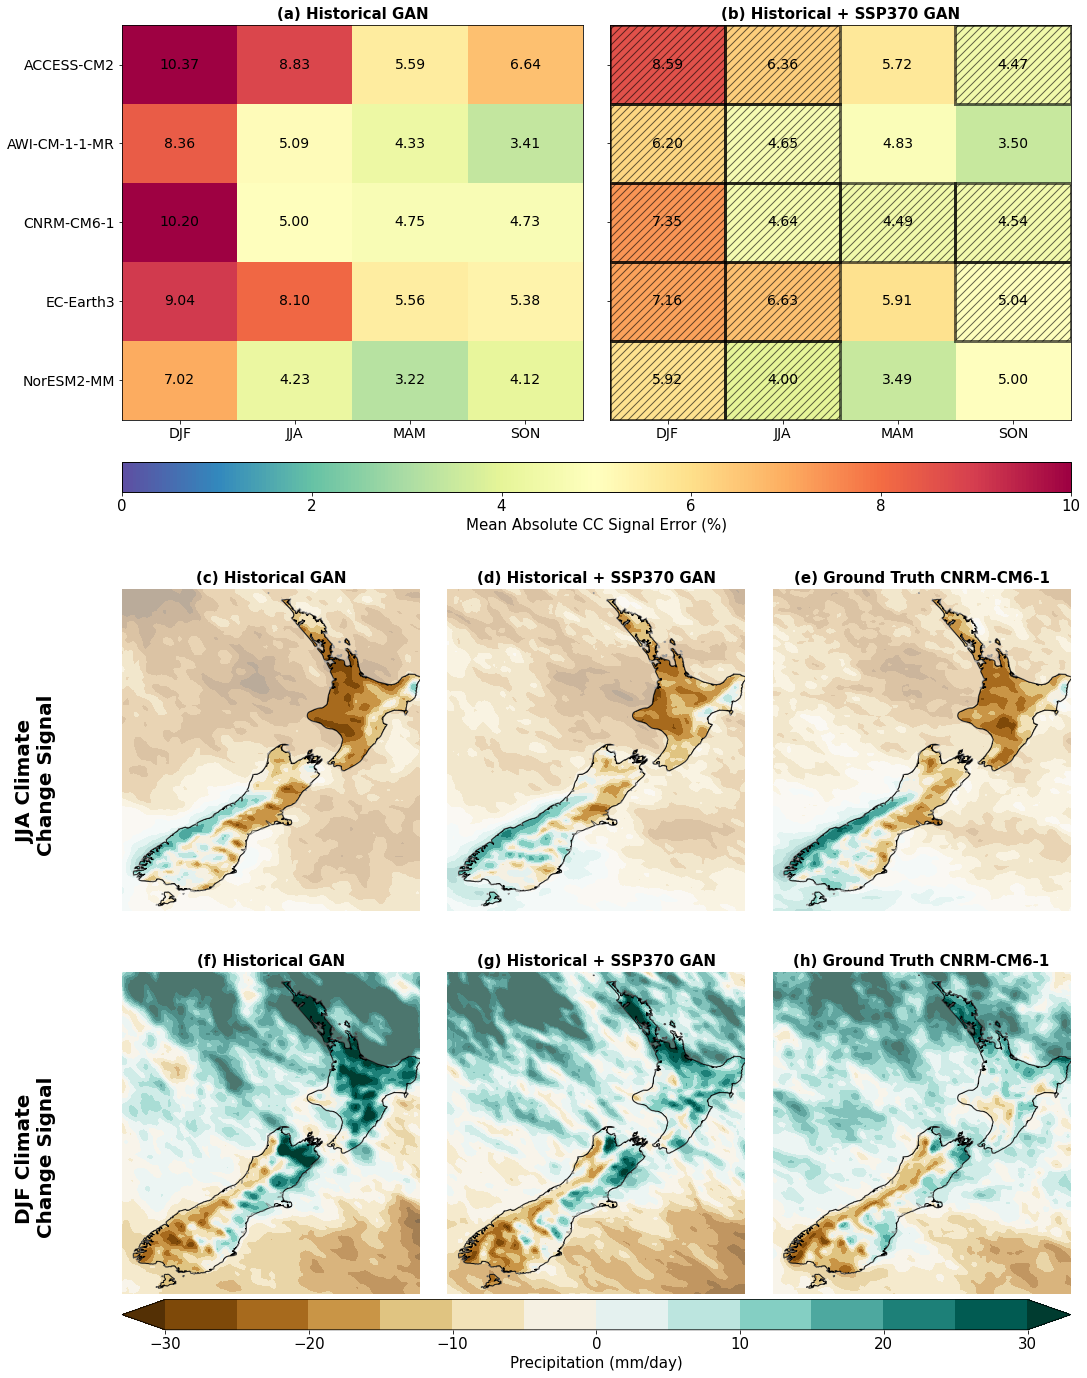

In [265]:

df_results_future_corr = pd.DataFrame()
df_results_hist_corr = pd.DataFrame()
df_results_future_mae = pd.DataFrame()
df_results_hist_mae = pd.DataFrame()


seasons = ['DJF','MAM','JJA','SON']
for season in seasons:
    for gcm in signal_gt.GCM.values:
        signal_gan = load_gcm(model_future, gcm)
        signal_gan2 = load_gcm(model_hist, gcm)
        v1 = signal_gan.seas_cc_signal.sel(season=season).mean("member")
        v2 = signal_gan2.seas_cc_signal.sel(season=season).mean("member")
        v3 = signal_gt.seas_cc_signal.sel(season=season).sel(GCM=gcm)
        v1 = v1.where(orog > 0, np.nan)
        v2 = v2.where(orog > 0, np.nan)
        v3 = v3.where(orog > 0, np.nan)
        corr1 = xr.corr(v1.stack(z =['lat','lon']).dropna("z"),
                        v3.stack(z =['lat','lon']).dropna("z"), dim ="z")

        corr2 = xr.corr(v2.stack(z =['lat','lon']).dropna("z"),
                        v3.stack(z =['lat','lon']).dropna("z"), dim ="z")

        mae1 = abs(v1 -v3).mean()

        mae2 = abs(v2 -v3).mean()
        df_results_future_corr.loc[season, gcm] = float(corr1.values)
        df_results_hist_corr.loc[season, gcm] = float(corr2.values)
        df_results_hist_mae.loc[season, gcm] = float(mae2.values)
        df_results_future_mae.loc[season, gcm] = float(mae1.values)
import seaborn as sns

from matplotlib.patches import Patch

cmap ='Spectral_r'
gs = GridSpec(36, 6)

# Create the figure
levels = np.arange(0, 6, 0.1)
fig = plt.figure(figsize=(17, 24))

# Heatmap plots
ax1 = fig.add_subplot(gs[:11, :3])
ax2 = fig.add_subplot(gs[:11, 3:])

# Additional plots
ax3 = fig.add_subplot(gs[15:25, :2], projection = ccrs.PlateCarree(central_longitude = 171.77))
ax4 = fig.add_subplot(gs[15:25, 2:4], projection = ccrs.PlateCarree(central_longitude = 171.77))
ax5 = fig.add_subplot(gs[15:25, 4:], projection = ccrs.PlateCarree(central_longitude = 171.77))

ax9 = fig.add_subplot(gs[25:, :2], projection = ccrs.PlateCarree(central_longitude = 171.77))
ax10 = fig.add_subplot(gs[25:, 2:4], projection = ccrs.PlateCarree(central_longitude = 171.77))
ax11 = fig.add_subplot(gs[25:, 4:], projection = ccrs.PlateCarree(central_longitude = 171.77))

ax6 = fig.add_subplot(gs[12, :])
ax7 = fig.add_subplot(gs[-1, :])

cs11 = ax2.imshow(df_results_future_mae.T, cmap=cmap, vmin=0, vmax=10, aspect='auto')
ax1.set_title('(a) Historical GAN', weight='bold', fontsize = 15)

cs2 = ax1.imshow(df_results_hist_mae.T, cmap=cmap, vmin=0, vmax=10, aspect='auto')


for i in range(df_results_hist_mae.T.shape[0]):
    for j in range(df_results_hist_mae.T.shape[1]):
        ax1.text(j, i, f'{df_results_hist_mae.T.iloc[i, j]:.2f}', ha='center', va='center', color='black', fontsize =14)
for i in range(df_results_future_mae.T.shape[0]):
    for j in range(df_results_future_mae.T.shape[1]):
        ax2.text(j, i, f'{df_results_future_mae.T.iloc[i, j]:.2f}', ha='center', va='center', color='black', fontsize =14)

ax1.set_yticks(np.arange(0,5))
ax1.set_yticklabels([str(x) for x in error_hist.GCM.values])

ax2.set_yticks(np.arange(0,5))
ax2.set_xticks(np.arange(0,4))
ax2.set_xticklabels([str(x) for x in error_hist.season.values])
ax1.set_xticks(np.arange(0,4))
ax1.set_xticklabels([str(x) for x in error_hist.season.values])

ax2.set_title('(b) Historical + SSP370 GAN', weight='bold', fontsize = 15)
ax2.set_yticks(ax1.get_xticks())
ax2.set_yticklabels([' '] *len(ax1.get_xticks()) )
cbar = fig.colorbar(cs11, cax=ax6, orientation='horizontal')

# heatmap_future_mae = sns.heatmap(df_results_future_mae, ax =ax[0,0], cmap ='Spectral_r',
#             vmin =0, vmax =10, annot=True, fmt=".2f", cbar=True, cbar_kws={"label": "MAE (%)"})
# heatmap_hist_mae = sns.heatmap(df_results_hist_mae, ax =ax[0,1], cmap ='Spectral_r',
#             vmin = 0, vmax =10, annot=True, fmt=".2f", cbar=True, cbar_kws={"label": "MAE (%)"})
# heatmap_future_corr = sns.heatmap(df_results_future_corr, ax =ax[1,0], cmap ='Spectral_r',
#             vmin =0, vmax =1, annot=True, fmt=".2f", cbar=True, cbar_kws={"label": "Spatial Correlation"})
# heatmap_hist_corr = sns.heatmap(df_results_hist_corr, ax =ax[1,1], cmap ='Spectral_r',
#             vmin = 0, vmax =1, annot=True, fmt=".2f", cbar=True, cbar_kws={"label": "Spatial Correlation"})
# Drawing boxes around areas where hist < future for MAE
mask_mae = df_results_hist_mae.T > df_results_future_mae.T
for i in range(df_results_future_mae.T.shape[0]):
    for j in range(df_results_future_mae.T.shape[1]):
        if mask_mae.iloc[i, j]:
            ax2.add_patch(plt.Rectangle((j-0.5, i-0.5), 1, 1, fill=False, edgecolor='k', lw=3, hatch='///', alpha =0.6))


levels = np.arange(-30, 35, 5)
gan_hist.seas_cc_signal.isel(GCM=2, season=1).mean("member").plot.contourf(ax=ax3, cmap='BrBG', add_colorbar =False, levels = levels, extend = 'both', transform = ccrs.PlateCarree())
cs1 = gan_future.seas_cc_signal.isel(GCM=2, season=1).mean("member").plot.contourf(ax=ax4, cmap='BrBG', add_colorbar =False, levels = levels, extend = 'both', transform = ccrs.PlateCarree())
(signal_gt.seas_cc_signal).isel(GCM=2, season=1).plot.contourf(ax=ax5,  cmap='BrBG', add_colorbar =False, levels =levels, extend = 'both', transform = ccrs.PlateCarree())
#ax44 = fig.add_axes([0.1, 0.05, 0.8, 0.03])
cbar2 = fig.colorbar(cs1, cax = ax7, orientation = 'horizontal')
cbar2.set_label('Precipitation (mm/day)', fontsize = 15)
cbar2.ax.tick_params(labelsize = 15)
for axes in [ax3, ax4, ax5]:
    axes.coastlines('10m')
    axes.set_extent([166, 178.5, -47.5, -34], crs=ccrs.PlateCarree())
    #ax.coastlines('10m')
    axes.add_feature(cfeature.OCEAN.with_scale('50m'), facecolor ='white', alpha =0.6,zorder =13, ec ='k')
    axes.axis('off')
ax3.set_title('(c) Historical GAN', weight ='bold', fontsize =15)
ax4.set_title('(d) Historical + SSP370 GAN', weight ='bold', fontsize =15)
ax5.set_title('(e) Ground Truth CNRM-CM6-1', weight ='bold', fontsize =15)
ax3.text(161.5, -45, '  JJA Climate \nChange Signal', fontsize =20, weight ='bold', transform = ccrs.PlateCarree(), rotation =90)




gan_hist.seas_cc_signal.isel(GCM=2, season=0).mean("member").plot.contourf(ax=ax9, cmap='BrBG', add_colorbar =False, levels = levels, extend = 'both', transform = ccrs.PlateCarree())
cs1 = gan_future.seas_cc_signal.isel(GCM=2, season=0).mean("member").plot.contourf(ax=ax10, cmap='BrBG', add_colorbar =False, levels = levels, extend = 'both', transform = ccrs.PlateCarree())
(signal_gt.seas_cc_signal).isel(GCM=2, season=0).plot.contourf(ax=ax11,  cmap='BrBG', add_colorbar =False, levels =levels, extend = 'both', transform = ccrs.PlateCarree())
#ax44 = fig.add_axes([0.1, 0.05, 0.8, 0.03])

for axes in [ax9, ax10, ax11]:
    axes.coastlines('10m')
    axes.set_extent([166, 178.5, -47.5, -34], crs=ccrs.PlateCarree())
    #ax.coastlines('10m')
    axes.add_feature(cfeature.OCEAN.with_scale('50m'), facecolor ='white', alpha =0.3,zorder =13, ec ='k')
    axes.axis('off')

ax9.set_title('(f) Historical GAN', weight ='bold', fontsize =15)
ax10.set_title('(g) Historical + SSP370 GAN', weight ='bold', fontsize =15)
ax11.set_title('(h) Ground Truth CNRM-CM6-1', weight ='bold', fontsize =15)
#ax55 = fig.add_axes([0.9, 0.5, 0.02, 0.4])
ax9.text(161.5, -45, '  DJF Climate \nChange Signal', fontsize =20, weight ='bold', transform = ccrs.PlateCarree(), rotation =90)

# Add colorbar manually
cbar = fig.colorbar(cs11, cax=ax6, orientation='horizontal')
cbar.set_label('Mean Absolute CC Signal Error (%)', fontsize = 15)
cbar.ax.tick_params(labelsize =15)
ax1.tick_params(labelsize =14)
ax2.tick_params(labelsize =14)
fig.savefig('/nesi/project/niwa00018/ML_downscaling_CCAM/A-Robust-Generative-Adversarial-Network-Approach-for-Climate-Downscaling/figures/future_cc_signal_error.png', dpi =500, bbox_inches ='tight')
fig.savefig('/nesi/project/niwa00018/ML_downscaling_CCAM/A-Robust-Generative-Adversarial-Network-Approach-for-Climate-Downscaling/figures/future_cc_signal_error.pdf', dpi =500, bbox_inches ='tight')


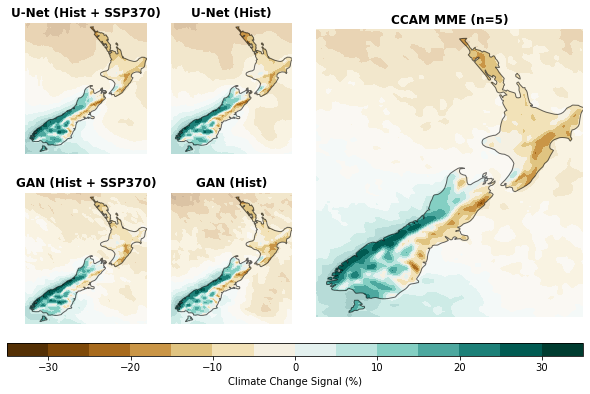

In [256]:
fig = plt.figure(figsize=(10, 6))
levels = np.arange(-35, 40, 5)
# Define GridSpec layout
gs = GridSpec(4, 4)

# Create subplots
ax1 = plt.subplot(gs[0:2, 0], projection=ccrs.PlateCarree(central_longitude=171.77))
ax2 = plt.subplot(gs[0:2, 1], projection=ccrs.PlateCarree(central_longitude=171.77))
ax3 = plt.subplot(gs[2:, 0], projection=ccrs.PlateCarree(central_longitude=171.77))
ax4 = plt.subplot(gs[2:, 1], projection=ccrs.PlateCarree(central_longitude=171.77))
ax5 = plt.subplot(gs[:, 2:], projection=ccrs.PlateCarree(central_longitude=171.77))

# Load data
# Plot data
unet_future.seas_cc_signal.sel(season = 'JJA').mean("member").mean("GCM").where(orog >= 0, np.nan).clip(-35, 35).plot.contourf( cmap='BrBG', ax=ax1, transform=ccrs.PlateCarree(), add_colorbar = False, levels = levels, extend ='neither' )
unet_hist.seas_cc_signal.sel(season = 'JJA').mean("member").mean("GCM").where(orog >= 0, np.nan).clip(-35, 35).plot.contourf(cmap='BrBG', ax=ax2, transform=ccrs.PlateCarree(), add_colorbar = False, levels = levels, extend ='neither' , )
gan_future.seas_cc_signal.sel(season = 'JJA').mean("member").mean("GCM").where(orog >= 0, np.nan).clip(-35, 35).plot.contourf(cmap='BrBG', ax=ax3, transform=ccrs.PlateCarree(), add_colorbar = False, levels = levels, extend ='neither' )
gan_hist.seas_cc_signal.sel(season = 'JJA').mean("member").mean("GCM").where(orog >= 0, np.nan).clip(-35, 35).plot.contourf(cmap='BrBG', ax=ax4, transform=ccrs.PlateCarree(), add_colorbar = False, levels = levels,  extend ='neither')
cs1 = signal_gt.seas_cc_signal.sel(season = 'JJA').mean("GCM").where(orog >= 0, np.nan).clip(-35, 35).plot.contourf(cmap='BrBG', ax=ax5, transform=ccrs.PlateCarree(), add_colorbar = False, levels = levels, extend ='neither')

# Set extent for first four subplots
for ax in [ax1, ax2, ax3, ax4, ax5]:
    ax.set_extent([166, 178.5, -47.5, -34], crs=ccrs.PlateCarree())
    #ax.coastlines('10m')
    ax.add_feature(cfeature.OCEAN.with_scale('50m'), facecolor ='white', alpha =0.6,zorder =13, ec ='k')
    ax.axis('off')
    ax.set_title('')
ax1.set_title('U-Net (Hist + SSP370)', weight ='bold')
ax2.set_title('U-Net (Hist)', weight ='bold')
ax3.set_title('GAN (Hist + SSP370)', weight ='bold')
ax4.set_title('GAN (Hist)', weight ='bold')
ax5.set_title('CCAM MME (n=5)', weight ='bold')
ax6 = fig.add_axes([0.1, 0.08, 0.8, 0.03])
cbar = fig.colorbar(cs1, cax = ax6, orientation ='horizontal')
cbar.set_label('Climate Change Signal (%)')
fig.savefig('/nesi/project/niwa00018/ML_downscaling_CCAM/A-Robust-Generative-Adversarial-Network-Approach-for-Climate-Downscaling/figures/JJAcc_signal_robust.png', dpi =500, bbox_inches ='tight')
fig.savefig('/nesi/project/niwa00018/ML_downscaling_CCAM/A-Robust-Generative-Adversarial-Network-Approach-for-Climate-Downscaling/figures/JJAcc_signal_robust.png', dpi =500, bbox_inches ='tight')

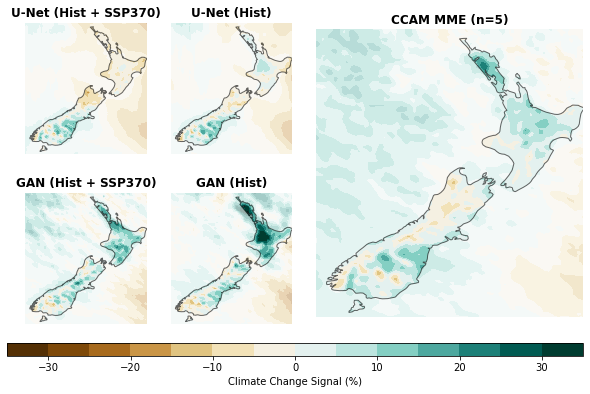

In [253]:
fig = plt.figure(figsize=(10, 6))
levels = np.arange(-35, 40, 5)
# Define GridSpec layout
gs = GridSpec(4, 4)

# Create subplots
ax1 = plt.subplot(gs[0:2, 0], projection=ccrs.PlateCarree(central_longitude=171.77))
ax2 = plt.subplot(gs[0:2, 1], projection=ccrs.PlateCarree(central_longitude=171.77))
ax3 = plt.subplot(gs[2:, 0], projection=ccrs.PlateCarree(central_longitude=171.77))
ax4 = plt.subplot(gs[2:, 1], projection=ccrs.PlateCarree(central_longitude=171.77))
ax5 = plt.subplot(gs[:, 2:], projection=ccrs.PlateCarree(central_longitude=171.77))

# Load data
# Plot data
unet_future.seas_cc_signal.sel(season = 'DJF').mean("member").mean("GCM").where(orog >= 0, np.nan).clip(-35, 35).plot.contourf( cmap='BrBG', ax=ax1, transform=ccrs.PlateCarree(), add_colorbar = False, levels = levels, extend ='neither' )
unet_hist.seas_cc_signal.sel(season = 'DJF').mean("member").mean("GCM").where(orog >= 0, np.nan).clip(-35, 35).plot.contourf(cmap='BrBG', ax=ax2, transform=ccrs.PlateCarree(), add_colorbar = False, levels = levels, extend ='neither' , )
gan_future.seas_cc_signal.sel(season = 'DJF').mean("member").mean("GCM").where(orog >= 0, np.nan).clip(-35, 35).plot.contourf(cmap='BrBG', ax=ax3, transform=ccrs.PlateCarree(), add_colorbar = False, levels = levels, extend ='neither' )
gan_hist.seas_cc_signal.sel(season = 'DJF').mean("member").mean("GCM").where(orog >= 0, np.nan).clip(-35, 35).plot.contourf(cmap='BrBG', ax=ax4, transform=ccrs.PlateCarree(), add_colorbar = False, levels = levels,  extend ='neither')
cs1 = signal_gt.seas_cc_signal.sel(season = 'DJF').mean("GCM").where(orog >= 0, np.nan).clip(-35, 35).plot.contourf(cmap='BrBG', ax=ax5, transform=ccrs.PlateCarree(), add_colorbar = False, levels = levels, extend ='neither')

# Set extent for first four subplots
for ax in [ax1, ax2, ax3, ax4, ax5]:
    ax.set_extent([166, 178.5, -47.5, -34], crs=ccrs.PlateCarree())
    #ax.coastlines('10m')
    ax.add_feature(cfeature.OCEAN.with_scale('50m'), facecolor ='white', alpha =0.6,zorder =13, ec ='k')
    ax.axis('off')
    ax.set_title('')
ax1.set_title('U-Net (Hist + SSP370)', weight ='bold')
ax2.set_title('U-Net (Hist)', weight ='bold')
ax3.set_title('GAN (Hist + SSP370)', weight ='bold')
ax4.set_title('GAN (Hist)', weight ='bold')
ax5.set_title('CCAM MME (n=5)', weight ='bold')
ax6 = fig.add_axes([0.1, 0.08, 0.8, 0.03])
cbar = fig.colorbar(cs1, cax = ax6, orientation ='horizontal')
cbar.set_label('Climate Change Signal (%)')

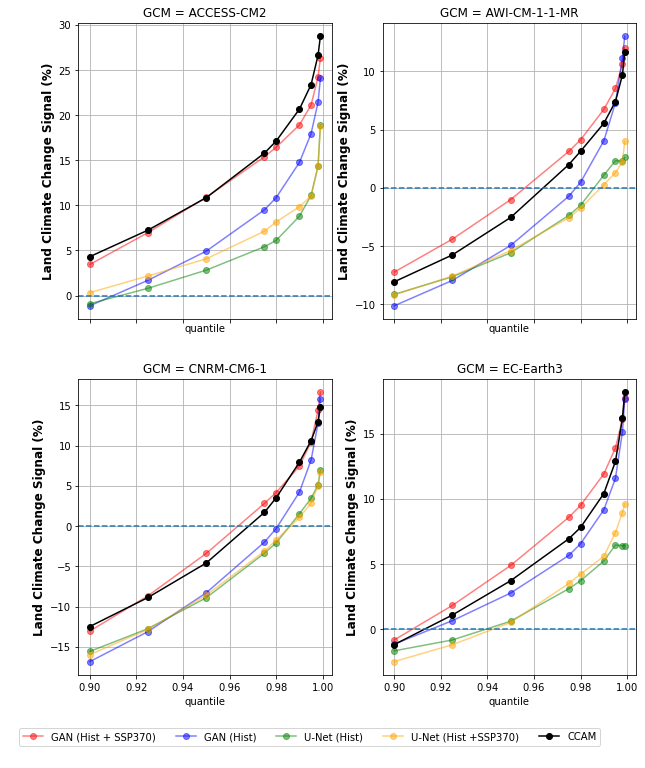

In [279]:
import matplotlib.pyplot as plt
import numpy as np

# Create a figure and axes
fig, axes = plt.subplots(2, 2, figsize=(10, 12), sharex=True)
axes = axes.ravel()

# Iterate over each subplot
for i, gcm in enumerate(signal_gt.GCM.values[:4]):
    ax = axes[i]

    # Your existing code to load data and plot signals
    # (Assuming the necessary data and variables are defined outside of this code snippet)
    signal_unet_future = load_gcm_unet(model_future, gcm).sel(quantile=slice(0.9, None))
    signal_unet_hist = load_gcm_unet(model_hist, gcm).sel(quantile=slice(0.9, None))
    signal_gan = load_gcm(model_future, gcm).sel(quantile=slice(0.9, None))
    signal_gan2 = load_gcm(model_hist, gcm).sel(quantile=slice(0.9, None))

    (signal_gan.where(orog > 0, np.nan)).mean(["lat", "lon", "member"]).cc_signal.plot(ax=ax, color='r', label='GAN (Hist + SSP370)', marker='o', alpha =0.5)
    (signal_gan2.where(orog > 0, np.nan)).mean(["lat", "lon", "member"]).cc_signal.plot(ax=ax, color='b', label='GAN (Hist)', marker='o', alpha =0.5)
    (signal_unet_hist.where(orog > 0, np.nan)).mean(["lat", "lon", "member"]).cc_signal.plot(ax=ax, color='g', label='U-Net (Hist)', marker='o', alpha =0.5)
    (signal_unet_future.where(orog > 0, np.nan)).mean(["lat", "lon", "member"]).cc_signal.plot(ax=ax, color='orange', label='U-Net (Hist +SSP370)', marker='o', alpha =0.5)
    (signal_gt.sel(quantile=slice(0.9, None)).where(orog > 0, np.nan)).mean(["lat", "lon"]).cc_signal.sel(GCM=gcm).plot(ax=ax, color='k', label='CCAM', marker='o',)

    # Customize subplot
    ax.set_ylabel('Land Climate Change Signal (%)', fontsize=12, weight='bold')
    ax.grid(True)
    ax.axhline(0.0, ls='--')
    ax.legend().remove()  # Remove legend from subplots

# Create a common legend outside of the subplots
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol =5, bbox_to_anchor=(0.43, 0.02))#, bbox_to_anchor=(0.5, -0.05), ncol=3)


plt.show()


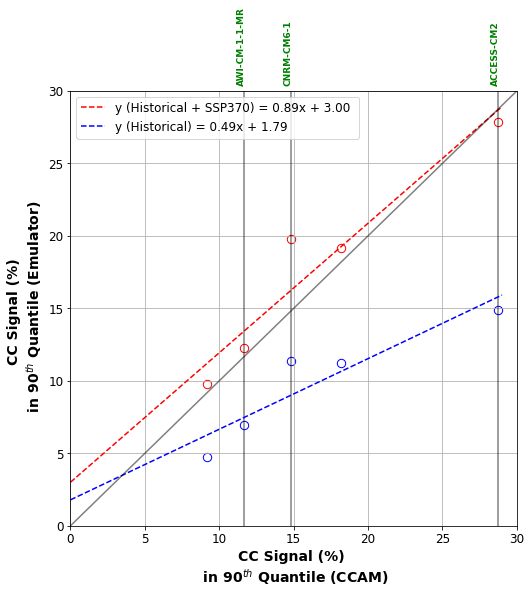

In [280]:


#signal_unet = xr.open_dataset(r'/nesi/project/niwa00018/ML_downscaling_CCAM/A-Robust-Generative-Adversarial-Network-Approach-for-Climate-Downscaling/outputs/Val_metrics/cc_signal/baseline_ACCESS-CM2.nc')
z1 =[]
z2 =[]
z3 = []
z4 = []
z5 =[]
for gcm in signal_gt.GCM.values[:]:
    model =r'future_run_precip_residual_new_unet_shuffle_off_new_iten_weight_new_padding_new_unet_V2_resid_now_1_iten_v3_ACCESS-CM2'#fig, ax = plt.subplots()
    #signal_gan = xr.open_dataset(r'//nesi/project/niwa00018/ML_downscaling_CCAM/multi-variate-gan/outputs/lightweight_access-cm2_multiple_discriminator_v2/CCAM_NIWA-REMS_ACCESS-CM2_hist_ssp370_tasmin.nc')
    signal_gan = xr.open_dataset(f'/nesi/project/niwa00018/ML_downscaling_CCAM/A-Robust-Generative-Adversarial-Network-Approach-for-Climate-Downscaling/outputs/{model}/CCAM_NIWA-REMS_{gcm}_hist_ssp370_pr_ens.nc')
    model ='historical_run_precip_residual_new_unet_shuffle_off_new_iten_weight_new_padding_new_unet_V2_resid_now_01_iten_ACCESS-CM2'
    #fig, ax = plt.subplots()
    signal_unet_future = load_gcm_unet(model_future, gcm)
    signal_unet_hist = load_gcm_unet(model_hist, gcm)
    #signal_gan = xr.open_dataset(r'//nesi/project/niwa00018/ML_downscaling_CCAM/multi-variate-gan/outputs/lightweight_access-cm2_multiple_discriminator_v2/CCAM_NIWA-REMS_ACCESS-CM2_hist_ssp370_tasmin.nc')
    signal_gan2 = xr.open_dataset(f'/nesi/project/niwa00018/ML_downscaling_CCAM/A-Robust-Generative-Adversarial-Network-Approach-for-Climate-Downscaling/outputs/{model}/CCAM_NIWA-REMS_{gcm}_hist_ssp370_pr_ens.nc')
    z1.append(signal_gan.cc_signal.where(orog > 0, np.nan).mean(["lat", "lon"]).sel(quantile = 0.999).mean().values)
    z2.append(signal_gan2.cc_signal.where(orog > 0, np.nan).mean(["lat", "lon"]).sel(quantile=0.999).mean().values)
    z4.append(signal_unet_future.cc_signal.where(orog > 0, np.nan).mean(["lat", "lon"]).sel(quantile=0.999).mean().values)
    z5.append(
        signal_unet_hist.cc_signal.where(orog > 0, np.nan).mean(["lat", "lon"]).sel(quantile=0.999).max().values)
    z3.append(signal_gt.sel(GCM =gcm).cc_signal.where(orog>0, np.nan).mean(["lat","lon"]).sel(quantile=0.999).values)
z1 = np.array(z1).ravel()
z2 = np.array(z2).ravel()
z3 = np.array(z3).ravel()
z4 = np.array(z4).ravel()
z5 = np.array(z5).ravel()
from scipy.stats import linregress
fig, ax = plt.subplots(figsize= (8, 8))
ax.scatter(z3, z1, marker ='o', color ='r', s= 70, fc ='white')
f = linregress(z3, z1)
x_test = np.arange(0, 30)
ax.plot(x_test, x_test * f.slope + f.intercept, label =f'y (Historical + SSP370) = {"%.2f" % f.slope}x + {"%.2f" % f.intercept} ', color ='r', ls ='--')

#
# ax.scatter(z3, z4, marker ='o', color ='orange', s= 50, fc ='white')
# f = linregress(z3, z4)
# x_test = np.arange(5, 30)
# ax.plot(x_test, x_test * f.slope + f.intercept, label =f'y (Hist + Future) = {"%.2f" % f.slope}x + {"%.2f" % f.intercept}x ($\lambda = 0 $)', color ='orange', ls ='--')
#
#
# ax.scatter(z3, z5, marker ='o', color ='g', s= 50, fc ='white')
# f = linregress(z3, z5)
# x_test = np.arange(5, 30)
# ax.plot(x_test, x_test * f.slope + f.intercept, label =f'y (Hist) = {"%.2f" % f.slope}x + {"%.2f" % f.intercept}x ($\lambda = 0 $)', color ='g', ls ='--')


ax.scatter(z3, z2, marker ='o', color ='b', s= 70, fc ='white')
f = linregress(z3, z2)
for i,gcm in enumerate(signal_gt.GCM.values[:3]):
    ax.text(z3[i]-0.5, 30.5, str(gcm), fontsize =9, rotation =90, weight ='bold', color ='green')
    ax.axvline(z3[i], color ='k', alpha =0.5)
x_test = np.arange(0, 30)
ax.plot(x_test, x_test * f.slope + f.intercept, label =f'y (Historical) = {"%.2f" % f.slope}x + {"%.2f" % f.intercept} ', color ='b', ls ='--')
ax.grid('on')
ax.plot([0,30],[0,30], color='k', ls ='-', alpha =0.5)
ax.legend(fontsize =12, fancybox =True)
ax.set_xlabel('CC Signal (%) \n in 90$^{th}$ Quantile (CCAM)', weight='bold', fontsize =14)
ax.set_ylabel('CC Signal (%) \n in 90$^{th}$ Quantile (Emulator)', weight='bold', fontsize =14)
ax.set_xlim(0, 30)
ax.set_ylim(0, 30)
ax.tick_params(labelsize=12)
# fig.savefig(r'/nesi/project/niwa00018/ML_downscaling_CCAM/A-Robust-Generative-Adversarial-Network-Approach-for-Climate-Downscaling/figures/all_models_rx3day_eval_0999_actual_qunatiles_land.png', dpi =500,
#             bbox_inches='tight')

In [135]:
cs1

In [45]:
cs

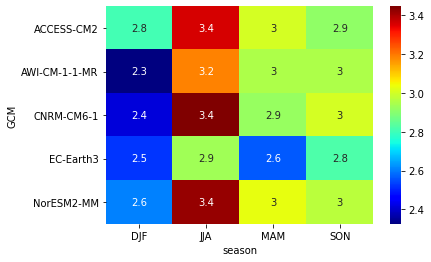

In [18]:
sns.heatmap(error_hist.mean(["lat","lon"]).to_pandas(), annot=True, cmap ='jet')

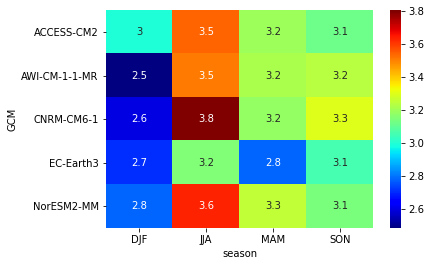

In [19]:
sns.heatmap(error_future.mean(["lat","lon"]).to_pandas(), annot=True, cmap ='jet')